#### **Import Libraries**

In [1]:
from pathlib import Path
import os 
import jax 
import jax.numpy as jnp 
from functools import partial
import numpy as np 

#### **Set Up Data Paths**

In [2]:
github_folder = str(Path(os.getcwd()).parent.parent.parent.absolute())
paper_link = github_folder + "/rfp_paper/figures/simulations/"
np_file_link: str = github_folder + "/rfp/examples/data/"
print(github_folder, paper_link, np_file_link)

/Users/patrickpower/Documents/GitHub /Users/patrickpower/Documents/GitHub/rfp_paper/figures/simulations/ /Users/patrickpower/Documents/GitHub/rfp/examples/data/


#### **Set Up Plotting**

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-dark-palette')

from matplotlib import font_manager 
locations = github_folder + '/rfp/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/patrickpower/Documents/GitHub/rfp/styles/Newsreader
/Users/patrickpower/Documents/GitHub/rfp/styles/Newsreader/static/Newsreader_9pt/Newsreader_9pt-Italic.ttf


/var/folders/yl/r206rt_11977v3zys5vb9ffw0000gn/T/ipykernel_19459/357715028.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [4]:
linear_results = np.load(np_file_link + f"dml_linear_comp.npy")
standard_nn_results = np.load(np_file_link + "dml_standard_nn.npy")
dml_original_results = np.load(np_file_link + "dml_original.npy")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/yl/r206rt_11977v3zys5vb9ffw0000gn/T/ipykernel_19459/857380146.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.savefig(paper_link + 'dml_simulation.png', format='png')
/Users/patrickpower/.pyenv/versions/rfp_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


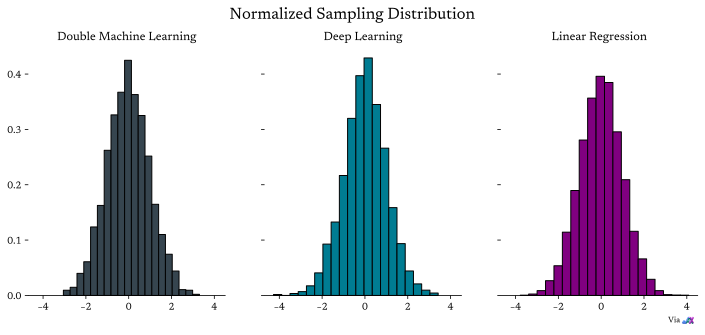

In [5]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, axs = plt.subplots(dpi=300, tight_layout=True, figsize=(12, 4.5), nrows=1, ncols=3, sharey=True, sharex=True)

for ax in axs.flatten():
    ax.set_axisbelow(True)

for key in 'left', 'right', 'top':
    for ax in axs.flatten():
        ax.spines[key].set_visible(False)

colors =['#36454F', '#007C92', '#800080']

axs[0].hist(dml_original_results, edgecolor="black", density=True, bins=20, color=colors[0])
axs[1].hist(standard_nn_results, edgecolor="black", density=True, bins=20, color=colors[1])
axs[2].hist(linear_results, edgecolor="black", density=True, bins=20, color=colors[2])

axs[0].set_title('Double Machine Learning')
axs[1].set_title('Deep Learning')
axs[2].set_title('Linear Regression')

fig.suptitle("Normalized Sampling Distribution", fontsize=16, y=1)

img_path = github_folder + '/rfp/jax_img.png'
img = plt.imread(img_path)

# create an OffsetImage object with the image
imagebox = OffsetImage(img, zoom=0.04)

# create the annotation with the OffsetImage object
xy = (0.95, - 0.1)
text = 'Via'
ann = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')

# add the annotation to the axis
axs[2].add_artist(ann)

# set the text for the annotation
axs[2].annotate(text, xy=(0.85, -0.1), xycoords='axes fraction',
            fontsize=8, color='black', ha='left', va='center')

plt.legend(frameon=False, loc='upper left')
fig.savefig(paper_link + 'dml_simulation.png', format='png')
plt.show()